## 실패   
다음 ipynb파일에서   
모델 변경, 학습당 data 개수 변경

In [1]:
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt

#x_train = np.load("MNIST_x_train.npy")
x_test = np.load("MNIST_x_test.npy")
###
x_train = x_test
x_train = np.reshape(x_train,(-1,28*28))
x_train = torch.tensor(x_train,dtype=torch.float32)

In [24]:
import torch
from torch.optim import Adam,SGD
from torch.nn import BCELoss,MSELoss
import matplotlib.pyplot as plt

class Discriminator(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 1),
        )
        
        self.optimizer = SGD(self.parameters(),lr=0.01)
        self.loss_fn = MSELoss()
        
        self.loss_hist =[]
        self.discriminate_hist = []
        self.num_epoch = 1
 
        # x_data = np.random.randn(100,2)
        # real_data = makeTdata()
        # self.x_data = torch.tensor(x_data,dtype=torch.float32)
        # self.real_data = torch.tensor(real_data,dtype=torch.float32)

    def forward(self,x):
        return self.model(x)

    def train(self,x,target):
        #x에는 fake와 real 섞여 있음

        for epoch in range(1,self.num_epoch+1):
            self.optimizer.zero_grad()
            y_pred = self.model(x)
            loss = self.loss_fn(y_pred,target)
            loss.backward()
            self.optimizer.step()

            self.loss_hist.append(loss.item())
            try:
                if epoch%(self.num_epoch//10)==0:
                    print(f"discriminator epoch {epoch},loss {loss.item():.4f}")
                    
                    self.discriminate_hist.append(y_pred[0].detach().numpy())
            except:
                print(f"discriminator epoch {epoch},loss {loss.item():.4f}")
                
                self.discriminate_hist.append(y_pred[0].detach().numpy())                

    def visualize(self):
        fig,axs = plt.subplots(1,2,figsize=(8,4))
        axs[0].plot(np.arange(1,len(self.discriminate_hist)+1),self.discriminate_hist)
        axs[0].set_title('discriminator result')
        axs[1].plot(np.arange(1,len(self.loss_hist)+1),self.loss_hist)
        axs[1].set_title('discriminator loss')
        plt.show()
        

In [25]:
class Generator(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(2, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,28*28),
            
        )

        self.optimizer = SGD(self.parameters(),lr=0.01)
        self.loss_fn = MSELoss()
        
        self.loss_hist =[]
        self.gen_hist = []
        self.num_epoch = 1
        

    def forward(self,x):
        return self.model(x)

    def train(self,D,x,target):
        # target은 D(fake)의 출력과 shape 같음 (n,1)
        for epoch in range(1,self.num_epoch+1):
            self.optimizer.zero_grad()
            make_fake = self.model(x)
            y_pred = D(make_fake)
            loss = self.loss_fn(y_pred,target)
            loss.backward()
            self.optimizer.step()

            self.loss_hist.append(loss.item())
            try:
                if epoch%(self.num_epoch//10)==0:
                    print(f"gen epoch {epoch},loss {loss.item():.4f}")

                    self.gen_hist.append(make_fake[0].detach().numpy())
            except:
                print(f"gen epoch {epoch},loss {loss.item():.4f}")

                self.gen_hist.append(make_fake[0].detach().numpy())
    def visualize(self,x):
        #(2*2)사이즈 8개 (16,2)로 -> hist의 [-1]만 그리기. # hist에 764짜리 8개 저장
        y_pred = self.model(x).detach().numpy()
        y_pred = np.reshape(y_pred,(-1,28,28))
        y_pred = np.transpose(y_pred,(1,0,2))
        y_pred = np.reshape(y_pred,(28,-1))

        plt.figure(figsize=(16,2))
        plt.imshow(y_pred)



In [26]:
num_data = x_train.shape[0]
random_seed = np.random.randn(num_data,2)
random_seed = torch.tensor(random_seed,dtype=torch.float32)

In [27]:
D=Discriminator()
G = Generator()
dummy=torch.empty_like(x_train,dtype=torch.float32)
real_label = torch.ones_like(D(dummy).detach())
fake_label = torch.ones_like(real_label)


In [37]:
num_iter = 100
for i in range(1,num_iter+1):
    random_seed = np.random.randn(num_data,2)
    random_seed = torch.tensor(random_seed,dtype=torch.float32)
    D.train(x_train,real_label)
    D.train(G(random_seed).detach(),fake_label)
    G.train(D,random_seed,real_label)    
    if i%(num_iter//10)==0:
        print(f'iter={i}')



discriminator epoch 1,loss 0.0035
discriminator epoch 1,loss 0.0018
gen epoch 1,loss 0.0018
discriminator epoch 1,loss 0.0035
discriminator epoch 1,loss 0.0019
gen epoch 1,loss 0.0019
discriminator epoch 1,loss 0.0034
discriminator epoch 1,loss 0.0018
gen epoch 1,loss 0.0018
discriminator epoch 1,loss 0.0034
discriminator epoch 1,loss 0.0018
gen epoch 1,loss 0.0018
discriminator epoch 1,loss 0.0034
discriminator epoch 1,loss 0.0019
gen epoch 1,loss 0.0018
discriminator epoch 1,loss 0.0034
discriminator epoch 1,loss 0.0018
gen epoch 1,loss 0.0018
discriminator epoch 1,loss 0.0034
discriminator epoch 1,loss 0.0018
gen epoch 1,loss 0.0017
discriminator epoch 1,loss 0.0033
discriminator epoch 1,loss 0.0018
gen epoch 1,loss 0.0018
discriminator epoch 1,loss 0.0033
discriminator epoch 1,loss 0.0018
gen epoch 1,loss 0.0018
discriminator epoch 1,loss 0.0033
discriminator epoch 1,loss 0.0018
gen epoch 1,loss 0.0018
iter=10
discriminator epoch 1,loss 0.0033
discriminator epoch 1,loss 0.0018
gen 

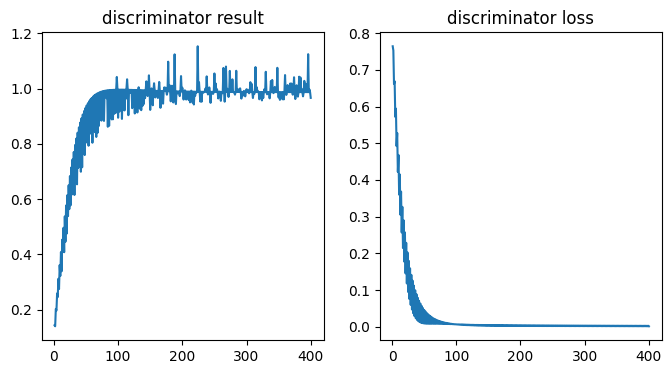

In [39]:
D.visualize()

tensor([[0.9667],
        [0.9685],
        [0.9743],
        [0.9869],
        [0.9834],
        [0.9965],
        [0.9688],
        [0.9645]], grad_fn=<AddmmBackward0>)


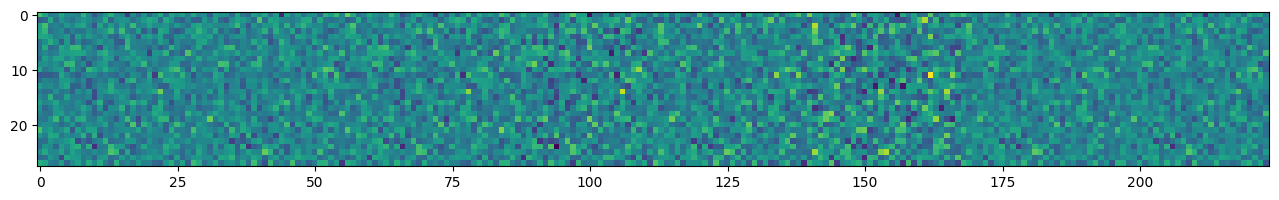

In [38]:
G.visualize(random_seed[0:8])
print(D(G(random_seed[0:8]).detach()))


In [34]:
random_seed[0:8].shape, random_seed[0].shape

(torch.Size([8, 2]), torch.Size([2]))

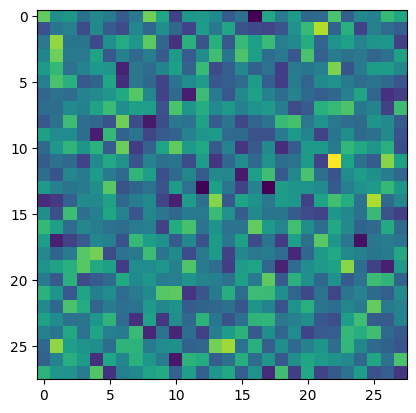

In [36]:
plt.imshow(G(random_seed[0].unsqueeze(0)).detach().numpy().reshape(28,28))